# **IEOR 4404  Simulation (Fall 2020)**

**Homework 1 [Total points: 80 Points]**


**Due 11:59 PM EST, Oct 4**

Homework 1 consists of application-oriented exercises focusing on Python and Statistics basics

The steps to finish the homework:

*   Step 1: Answer your homework on Google Colab.
*   Step 2: Submit the copy on Google Assignment

Before you submit your assignment, make sure to re-run your code from the beginning. (You can do so by first clicking Runtime/Reset All Runtimes and then clicking Runtime/Run all)



In [1]:
#Your Name: Yi-Ping Tseng
#Your UNI: yt2690

In [1]:
!pip install sympy -U

Requirement already up-to-date: sympy in /usr/local/lib/python3.6/dist-packages (1.6.2)


In [2]:
#This imports all the packages you need for the homework
#Please run this first
import numpy as np

import scipy.special as spsp

import matplotlib.pyplot as plt

%matplotlib inline

import sympy
from sympy import init_printing
init_printing()


In [3]:
!pip list | grep sympy

sympy                         1.6.2          


#Exercise 1 [Total: 60 points]


## Setting

**Negative Binomial Distribution** is a discrete probability distribution that models the number of successes (Our outcome variable: $k$) in a sequence of independent and identically distributed Bernoulli trials (with the probability of success=$p$) before a specified (non-random) number of failures (denoted $r$) occurs (Source: Wikipedia [Negative Binomial Distribution](https://en.wikipedia.org/wiki/Negative_binomial_distribution)).

The probability mass function follows

$P(k)=\frac{(k+r-1)!}{k!(r-1)!}p^k(1-p)^r$ where $k=0, 1, 2, ..., \infty$


**An application of Negative Binomial Distribution:**

Pokemon Go is a mobile app game in which users encounter different pokemon one by one and catch them. Shiny pokemon is a special version of pokemon, which has a different color from the normal version. 

<img src="https://d2skuhm0vrry40.cloudfront.net/2017/articles/1/8/9/1/5/2/5/pokemon-go-shinies-how-to-catch-shiny-magikarp-red-gyarados-and-how-shinies-work-1490264028872.jpg/EG11/thumbnail/750x422/format/jpg/quality/60" alt="Italian Trulli" width=400>


Assume that the probability of encountering a shiny pokemon is 0.1 and each encounter is independent of another. We are interested in studying the distribution of the total number of non-shiny pokemon a person needs to encounter before seeing 3 shiny Pokemon.



## Q1. [10 points]


* Using `NumPy` operations to construct an array that contains the probabilities of encountering different numbers of non-shiny pokemon (from 0,1,2,3,..., 120) before encountering 3 shiny pokemon. 
* Based on the array, report the probability of encountering at most 20 non-shiny pokemon before seeing 3 shiny pokemon.
* Based on the array, report the probability of encountering at least 40 non-shiny pokemon before seeing 3 shiny pokemon.
* Report the probability for encountering 20, 21, 22, 23, 24, or 25 non-shiny pokemon before getting 3 shiny pokemon.  

**[no loop allowed]**
**[You are not allowed to use scipy.stats.nbinom to get the PMF or CDF]**


In [4]:
'''
success: meet non-shiny pokemon
failure: meet shiny pokemon
negative binomial: the prob of encounting non-shiny pokemon before meeting 
  three non-shiny pokemon
'''
count = np.arange(0, 121, 1)
p = 0.9
r = 3
def prob(p, r, k):
  return spsp.comb(k+r-1, k) * (p)**k * (1-p)**r

print(
    'the probabilities for encountering at most 20 non-shiny pokemon before seeing 3 shiny pokemons: ',
    sum(prob(p, r, count[:21]))
)
print(
    'the probabilities for encountering at least 40 non-shiny pokemon before seeing 3 shiny pokemons: ',
    sum(prob(p, r, count[40:]))
)
print(
    'the probabilities for encountering 20, 21, 22, 23, 24, or 25 non-shiny pokemon before seeing 3 shiny pokemons: ',
    prob(p, r, count[20:26])
)


the probabilities for encountering at most 20 non-shiny pokemon before seeing 3 shiny pokemons:  0.40804326879851793
the probabilities for encountering at least 40 non-shiny pokemon before seeing 3 shiny pokemons:  0.1948550664326549
the probabilities for encountering 20, 21, 22, 23, 24, or 25 non-shiny pokemon before seeing 3 shiny pokemons:  [0.02808421 0.027683   0.02717968 0.02658881 0.02592409 0.02519822]


##Q2. [4 points]

Visualize the probability mass function in this setting using $k=0,1,2,3,\dots,120$.

**[no loop allowed]**
**[You are not allowed to use scipy.stats.nbinom to get the PMF or CDF]**



Text(0, 0.5, 'probability')

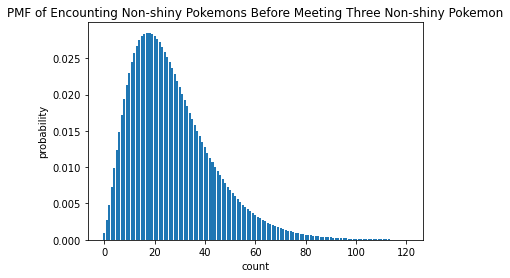

In [5]:
plt.bar(count, prob(p, r, count))
plt.title('PMF of Encounting Non-shiny Pokemons Before Meeting Three Non-shiny Pokemon')
plt.xlabel('count')
plt.ylabel('probability')

##Q3. [4 points]

The expected value of the variance of this distribution have a closed-form solution. Find the formula for these two values using the Wikipedia link provided in the setting and compute the values in the context of this question in the cell below.

**[no loop allowed]** **[You are not allowed to use scipy.stats.nbinom to get the PMF or CDF]**



In [6]:
print('mean: ', (p*r)/(1-p))
print('variance: ', (p*r)/(1-p)**2)

mean:  27.000000000000007
variance:  270.00000000000017


##Q4. [4 points]

Use the arrays we generated in Q1 to approximate the expected value and the variance based on the formula we discussed in class.

**[no loop allowed]** **[You are not allowed to use scipy.stats.nbinom to get the PMF or CDF]**



In [7]:
exp_mean = sum(count*prob(p, r, count))
exp_variance = sum(count**2 * prob(p, r, count)) - exp_mean**2
print('expected mean: ', exp_mean)
print('expected variance: ', exp_variance)

expected mean:  26.96679469655563
expected variance:  267.3971375505291


##Q5. [6 points]

Use `sympy` to derive the close-form solution of the expected value and the variance as a function of $r$ and $p$.

Your solution for $p<1$ should give the equivalent result as what you found on Wikipedia.

**[no loop allowed]** **[You are not allowed to use scipy.stats.nbinom to get the PMF or CDF]**



In [8]:
x = sympy.Symbol("x", nonnegative=True)
r = sympy.Symbol("r", positive=True)
p = sympy.Symbol("p", positive=True)

In [9]:
x, r, p

In [10]:
fact = sympy.factorial(x+r-1)/(sympy.factorial(x)*sympy.factorial(r-1))
pmf = fact * p**x * (1-p)**r
mean = sympy.Sum(x * pmf, (x, 0, sympy.oo)).doit()
sympy.simplify(mean)

⎧             -p⋅r                          
⎪             ─────                for p < 1
⎪             p - 1                         
⎪                                           
⎪           ∞                               
⎪          ____                             
⎪          ╲                                
⎪           ╲    x                          
⎨       r    ╲  p ⋅x⋅Γ(r + x + 1)           
⎪(1 - p) ⋅   ╱  ─────────────────           
⎪           ╱    (r + x)⋅Γ(x + 1)           
⎪          ╱                                
⎪          ‾‾‾‾                             
⎪         x = 0                             
⎪────────────────────────────────  otherwise
⎪              Γ(r)                         
⎩                                           

In [11]:
var = sympy.Sum((x**2) * pmf, (x, 0, sympy.oo)).doit() - mean**2
sympy.simplify(var)

⎧                                   p⋅r                                       
⎪                                 ────────                                    
⎪                                        2                                    
⎪                                 (p - 1)                                     
⎪                                                                             
⎪         ⎛                                    2                           ⎞  
⎪         ⎜           ⎛  ∞                    ⎞                            ⎟  
⎪         ⎜           ⎜ ____                  ⎟                            ⎟  
⎪         ⎜           ⎜ ╲                     ⎟                            ⎟  
⎪         ⎜           ⎜  ╲    x               ⎟                            ⎟  
⎪         ⎜         r ⎜   ╲  p ⋅x⋅Γ(r + x + 1)⎟                            ⎟  
⎨         ⎜  (1 - p) ⋅⎜   ╱  ─────────────────⎟      ∞                     ⎟  
⎪         ⎜           ⎜  ╱    (r + x)⋅Γ(x + 1)⎟     

##Q6. [10 points]

* Use inverse transform method to generate 1000 samples. Start the search from $k=0$.
* Plot both the theretical distribution and the sample distribution using the same plot

**[Since $x$ can reach $\infty$, remember to use a while loop.]**

**[You are not allowed to use scipy.stats.nbinom to get the PMF or CDF]**


In [12]:
def find_outcome(p, r, u=None):
  x = 0
  pmf = prob(p, r, x)
  cdf = pmf

  if not u:
    u = np.random.rand()

  while u >= cdf:
    pmf = pmf * (x+r)/(x+1) * p
    cdf += pmf
    x += 1
  return x

In [13]:
np.random.seed(100)
p = 0.9
r = 3


n = 1000
samples = [find_outcome(p, r) for _ in range(n)]
uni, count = np.unique(samples, return_counts=True)

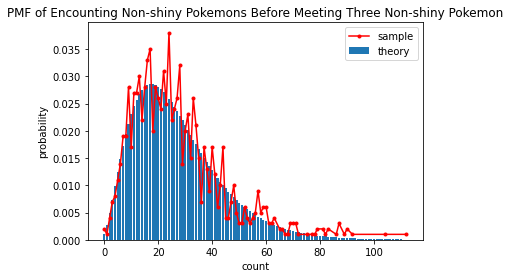

In [14]:
plt.bar(
    np.arange(uni[0], uni[-1]+1), 
    prob(p, r, np.arange(uni[0], uni[-1]+1)),
    label='theory'
)
plt.plot(uni, count/np.sum(count), '.r-', label="sample", zorder=2)
plt.legend(loc="best")
plt.title('PMF of Encounting Non-shiny Pokemons Before Meeting Three Non-shiny Pokemon')
plt.xlabel('count')
plt.ylabel('probability')
plt.show()

## Q7. [10 points]
* Use inverse transform method to generate 1000 samples. Perform an upward/downward search from $\lfloor E(k) \rfloor$.
* Plot both the theretical distribution and the sample distribution using the same plot.
* Use %%timeit to measure the amount of time to run the list comprehension when generating 100 samples. [Bonus points will be offered based on run time. ] 

**[You are not allowed to use scipy.stats.nbinom to get the PMF or CDF]**

In [15]:
def find_outcome_updown(p, r, u=None):
  start = int((p*r)/(1-p))
  
  x = 0
  pmf = prob(p, r, 0)
  cdf = pmf
  for i in range(1, start + 1):
    pmf = pmf * (x+r)/(x+1) * p
    cdf += pmf
    x += 1
  
  if not u:
    u = np.random.rand()

  if u >= cdf:
    pmf = pmf * (start + r)/(start + 1) * p
    cdf += pmf
    start += 1

    while u >= cdf:
      pmf = pmf * (start + r)/(start + 1) * p
      cdf += pmf
      start += 1

  else:
    cdf -= pmf
    pmf = pmf * start / ((start - 1 + r) * p)
    start -= 1

    while u < cdf:
      cdf -= pmf
      pmf = pmf * start / ((start - 1 + r) * p)
      start -= 1
    
    start = start + 1
  return start


In [16]:
%%timeit
np.random.seed(100)
p = 0.9
r = 3

n = 100
samples_updown = [find_outcome_updown(p, r) for _ in range(n)]
uni_updown, count_updown = np.unique(samples_updown, return_counts=True)

100 loops, best of 3: 4.61 ms per loop


In [17]:
%%time
np.random.seed(100)
p = 0.9
r = 3

n = 1000
print('number of points: ', n)
samples_updown = [find_outcome_updown(p, r) for _ in range(n)]
uni_updown, count_updown = np.unique(samples_updown, return_counts=True)

number of points:  1000
CPU times: user 57.2 ms, sys: 953 µs, total: 58.1 ms
Wall time: 57.6 ms


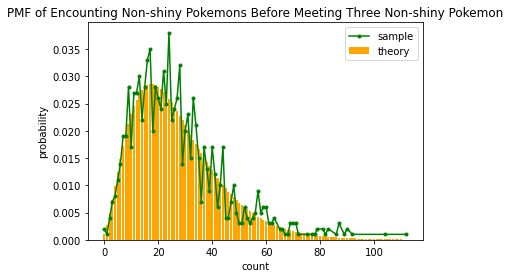

In [18]:
plt.bar(
    np.arange(uni_updown[0], uni_updown[-1]+1), 
    prob(p, r, np.arange(uni_updown[0], uni_updown[-1]+1)),
    color='orange',
    label='theory'
)
plt.plot(
    uni_updown, 
    count_updown/np.sum(count_updown), 
    '.g-', 
    label="sample", 
    zorder=2
)
plt.legend(loc="best")
plt.title('PMF of Encounting Non-shiny Pokemons Before Meeting Three Non-shiny Pokemon')
plt.xlabel('count')
plt.ylabel('probability')
plt.show()

##Q8 [12 points]

* Use `sympy` to derive the expected  number of searches as a function of $r$, $p$ and the starting value of search $i$ for an upward/downward search algorithm. 
* Compare the expected number of searches in Q6 with the expected number in Q7.
* Find a better starting point than $\lfloor E(k) \rfloor$ based on the expected number of searches. 


In [19]:
x = sympy.Symbol("x", nonnegative=True)
r = sympy.Symbol("r", positive=True)
p = sympy.Symbol("p", positive=True)
i = sympy.Symbol("i", positive=True)

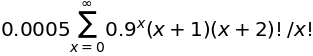

In [26]:
fact = sympy.factorial(x+r-1)/(sympy.factorial(x)*sympy.factorial(r-1))
pmf = fact * p**x * (1-p)**r


exp_search = sympy.Sum((x + 1) * pmf, (x, 0, sympy.oo))
exp_search.simplify().subs({r: 3, p: 0.9})

In [32]:
downward = sympy.Sum(pmf * (sympy.floor(i) + 2 - x), (x, 0, sympy.floor(i))).doit()
upward = sympy.Sum(pmf * (x - sympy.floor(i) + 1), (x, sympy.floor(i) + 1, sympy.oo)).doit()
exp_search_updown = downward + upward
exp_search_updown.simplify().subs({r: 3, p: 0.9})

    ⎛         ⌊i⌋ + 1                        ┌─  ⎛1, ⌊i⌋ + 4 │    ⎞           
5.0⋅⎜0.002⋅0.9       ⋅Γ(⌊i⌋ + 1)⋅Γ(⌊i⌋ + 4)⋅ ├─  ⎜           │ 0.9⎟ - 0.002⋅0.
    ⎝                                       2╵ 1 ⎝ ⌊i⌋ + 1   │    ⎠           
──────────────────────────────────────────────────────────────────────────────
                                                                              

 ⌊i⌋ + 1                        ┌─  ⎛1, ⌊i⌋ + 4 │    ⎞            ⌊i⌋ + 1     
9       ⋅Γ(⌊i⌋ + 1)⋅Γ(⌊i⌋ + 4)⋅ ├─  ⎜           │ 0.9⎟ + 0.002⋅0.9       ⋅Γ(⌊i
                               2╵ 1 ⎝ ⌊i⌋ + 2   │    ⎠                        
──────────────────────────────────────────────────────────────────────────────
                                                                              

               ┌─  ⎛1, ⌊i⌋ + 4 │    ⎞                           ⌊i⌋ + 1       
⌋ + 4)⋅Γ(⌊i⌋)⋅ ├─  ⎜           │ 0.9⎟ - 0.000999999999999999⋅0.9       ⋅Γ(⌊i⌋ 
              2╵ 1 ⎝ ⌊i⌋ + 1   │    ⎠             

#Exercise 2 [Total: 20 points]




##Setting

Benford's law, also called the first-digit law, is an observation of the frequency distribution of leading digits in many real-life sets of numerical data. The law states that in many naturally occurring collections of numbers, the leading significant digit is likely to be small. For example, in sets that obey the law, the number 1 appears as the most significant digit about 30% of the time, while 9 appears as the most significant digit less than 5% of the time. Benford's law also makes predictions about the distribution of second digits, third digits, digit combinations, and so on.

It has been shown that this result applies to a wide variety of data sets, including electricity bills, stock prices, house prices, income tax, corporate disbursements, sales figures,  demographics data, and scientific data.

A number is said to satisfy Benford's law if the leading digit d (d ∈ {1, ..., 9}) occurs with probability :

$P(d)=\log _{10}(d+1)-\log _{10}(d)=\log _{10}\left({\frac {d+1}{d}}\right)=\log _{10}\left(1+{\frac {1}{d}}\right)$











##Q1. [10 Points]

We discussed a shortcut that can help us implement the inverse transform method without doing the search. The examples we have seen so far include geometric distribution and uniform discrete distribution.  Please derive the formula (You do not need to show the derivation in your submission). [Hint: you will need to derive the CDF first]
* Use `sympy` to derive the CDF of this distribution. Clearly show your steps.
* Based on the CDF, derive a formula that can directly convert a $u$ to a $d$ sample based on floor operation. [No need to show the derivation]. Based on your derivation result, simulate 10000 samples. 
* Plot the distribution of the samples using a bar chart. Also, show the scatter plot of the theoretical pmf on the same chart. </font > 


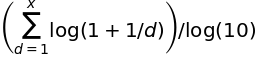

In [41]:
d = sympy.Symbol("d", positive=True)
pmf = sympy.log((1 + 1/d), 10)
cdf = sympy.Sum(pmf, (d, 1, x))
cdf.simplify()

In [46]:
def find_outcome_benford(u=None):
  if not u:
    u = np.random.rand()

  return int(10**u)

def pmf_benford(d):
  return np.log10(1+1/d)

samples_benford = [find_outcome_benford() for _ in range(10000)]
uni_benford, count_benford = np.unique(samples_benford, return_counts=True)

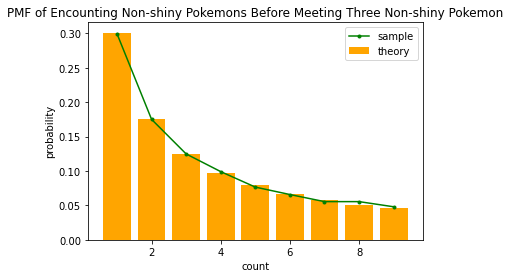

In [47]:
plt.bar(
    np.arange(uni_benford[0], uni_benford[-1]+1), 
    pmf_benford(np.arange(uni_benford[0], uni_benford[-1]+1)),
    color='orange',
    label='theory'
)
plt.plot(
    uni_benford, 
    count_benford/np.sum(count_benford), 
    '.g-', 
    label="sample", 
    zorder=2
)
plt.legend(loc="best")
plt.title('PMF of Encounting Non-shiny Pokemons Before Meeting Three Non-shiny Pokemon')
plt.xlabel('count')
plt.ylabel('probability')
plt.show()

##Q2. [10 points]

This distribution has been widely applied. For example, it has been used to detect possible fraud. For naturally occuring numbers, the first digit should follow Benford's law.  [For example, the first digit of 13.23 is 1]. However, fabricated data is likely not to follow the data.

The following data comes from the case State of Arizona v. Wayne James Nelson (CV92-18841). Nelson, a manager in Office of Arizona State Treasurer, is charged to have diverted nearly $2m funds to a fictitious vendor. Use simulation to study whether the amount might be fabricated by doing the following. 

* 1. Draw samples from this hypothetical distribuion [make sure that the sample size being comparable to the size of the observed samples] 
* 2. visualze the distribution of the samples using a line plot with marker "o". 
* 3. To ensure the robustness, repeat step 1 and step 2 10 times. Thus, in the same graph, you will have 10 line plots. 
* 4. In the same graph, plot the distribution of the actual data we observe using a bar chart.
* 5. Based on the graph, briefly argue whether the amount might be fabricated.


'According to the Benford Law, the amount starting with 8 and 9 might be fabricated.'

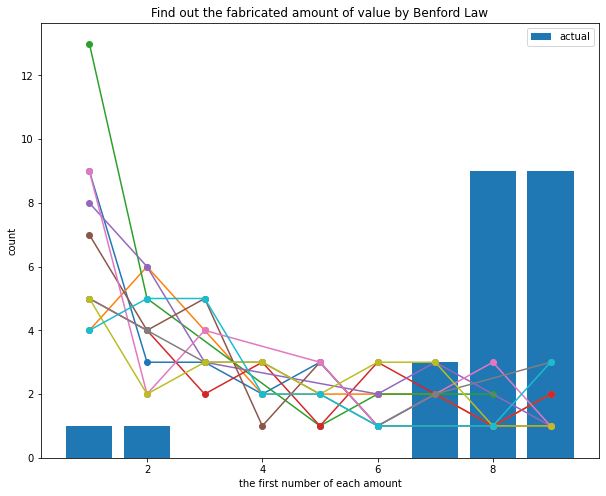

In [68]:
amount = np.array([1927.46, 27902.31, 86241.90, 72117.46, 81321.75, 97473.96, 93249.11, 89658.17, 87776.89, 92105.83, 79949.16, 87602.93, 96879.27, 91806.47, 84991.67, 90831.83, 93776.67, 88336.72, 94639.69, 83709.28, 96412.21, 88432.86, 71552.15])
#get first digits use `int(str(num)[0])`

amount_firstNum = [int(str(i)[0]) for i in amount]
uni_amount, count_amount = np.unique(amount_firstNum, return_counts=True)

plt.figure(figsize=(10, 8))
for _ in range(10):
  samples_benford = [find_outcome_benford() for _ in range(len(amount))]
  uni_benford, count_benford = np.unique(samples_benford, return_counts=True)
  plt.plot(uni_benford, count_benford, '-o') # , label='simulation - %s' % str(i)

plt.bar(uni_amount, count_amount, zorder=2, label='actual')
plt.legend(loc='upper right')
plt.title('Find out the fabricated amount of value by Benford Law')
plt.xlabel('the first number of each amount')
plt.ylabel('count')

'''According to the Benford Law, the amount starting with 8 and 9 might be fabricated.'''